In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")

### a) Understanding Data:
1) Hypothesis Generation
2) Getting the system ready and loading the data
3) Dataset Structure and Content
4) Feature Extraction
5) Exploratory Analysis

### b) Forecasting using Multiple Modeling Techniques:
1) Splitting the data into training and validation part
2) Modeling techniques
3) Holt’s Linear Trend Model on daily time series
4) Holt Winter’s Model on daily time series
5) Introduction to ARIMA model
6) Parameter tuning for ARIMA model
7) SARIMAX model on daily time series

In [17]:
train= pd.read_csv("./Train_SU63ISt.csv")
train.head()
test=pd.read_csv("./Test_0qrQsBZ.csv")
test.head()

,ID,Datetime
0,18288,26-09-2014 00:00
1,18289,26-09-2014 01:00
2,18290,26-09-2014 02:00
3,18291,26-09-2014 03:00
4,18292,26-09-2014 04:00


### Dependent Variable is . : Passenger Count

### 1) Hypothesis Generation
###Hypothesis generation helps us to point out the factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect the passenger count(dependent variable for this time series problem) on the JetRail:

1. There will be an increase in the traffic as the years pass by.
Explanation - Population has a general upward trend with time, so I can expect more people to travel by JetRail. Also, generally companies expand their businesses over time leading to more customers travelling through JetRail.
2. The traffic will be high from May to October.
Explanation - Tourist visits generally increases during this time perion.
3. Traffic on weekdays will be more as compared to weekends/holidays.
Explanation - People will go to office on weekdays and hence the traffic will be more
4. Traffic during the peak hours will be high.
Explanation - People will travel to work, college.

In [18]:
#Let’s make a copy of train and test data so that even if we do changes in these dataset we do not lose the original dataset.

train_original=train.copy() 
test_original=test.copy()

In [19]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [20]:
#Let’s look at the data types of each feature.
train.dtypes, test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object, ID           int64
 Datetime    object
 dtype: object)

In [21]:
#Now we will see the shape of the dataset.
train.shape, test.shape

((18288, 3), (5112, 2))

Now we will extract more features to validate our hypothesis.

### 4) Feature Extraction
We will extract the time and date from the Datetime. We have seen earlier that the data type of Datetime 
is object. So first of all we have to change the data type to datetime format otherwise we can not extract features from it.


In [23]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


,ID,Count
count,18288.000000,18288.000000
mean,9143.500000,138.958115
std,5279.435197,153.467461
min,0.000000,2.000000
25%,4571.750000,22.000000
50%,9143.500000,84.000000
75%,13715.250000,210.000000
max,18287.000000,1244.000000


In [10]:
# for time series the data should be datetime64 types. Here Datetime is in object type so converting it into Datetime
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [24]:
# errors='coerce' then Invalid parsing will be set as 'NaT'
train['Datetime']= pd.to_datetime(train['Datetime'], errors='coerce')

train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test_original['Datetime'] = pd.to_datetime(test_original.Datetime,format='%d-%m-%Y %H:%M') 
train_original['Datetime'] = pd.to_datetime(train_original.Datetime,format='%d-%m-%Y %H:%M')

In [13]:
train.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [14]:
# Plotting date time column... Always set date as index
train= train.set_index('Datetime')

In [16]:
# C hecking index has been changed to date column
train.head()

,ID,Count
Datetime,,
2012-08-25 00:00:00,0,8
2012-08-25 01:00:00,1,2
2012-08-25 02:00:00,2,6
2012-08-25 03:00:00,3,2
2012-08-25 04:00:00,4,2


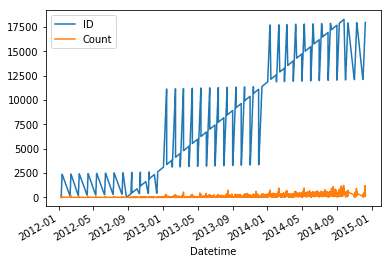

In [44]:
df.plot()

In [45]:
plt.show()

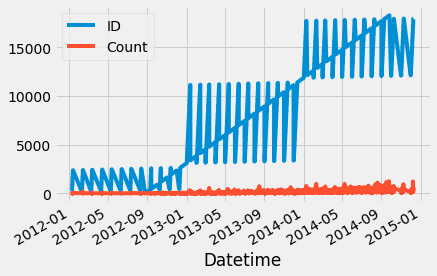

In [46]:
# Adding style to plots
plt.style.use('fivethirtyeight')
df.plot()
plt.show()

In [47]:
# matplotlib style sheets
print(plt.style.available)

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


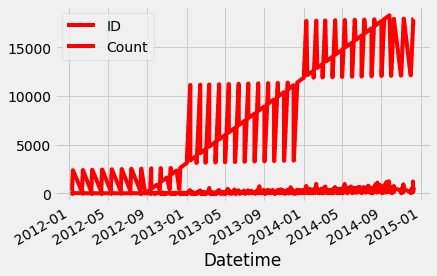

In [49]:
ax= df.plot(color='red')

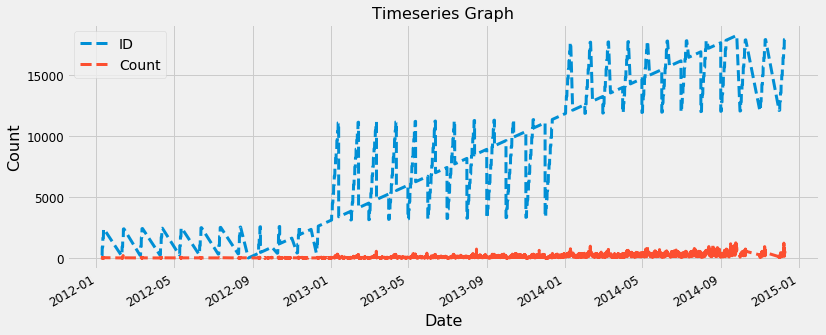

In [53]:
ax = df.plot(figsize=(12,5),fontsize=12, linewidth=3, linestyle='--')
ax.set_xlabel('Date',fontsize=16)
ax.set_ylabel('Count',fontsize=16)
ax.set_title("Timeseries Graph", fontsize=16)
plt.show()

##
#ax = df.plot(...) and wondered about the purpose of the ax object. This is because the plot function returns a 
#matplotlib AxesSubplot object, and it is common practice to assign this returned object to a variable called ax

In [56]:
# subsetting time series data
df_subset= df['2012-01' :'2012-05']

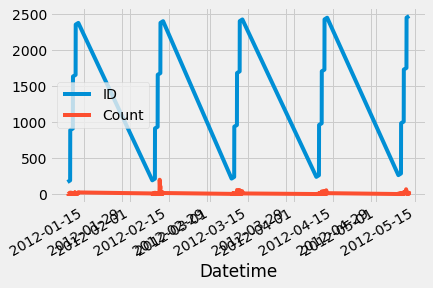

In [59]:
df_subset.plot()

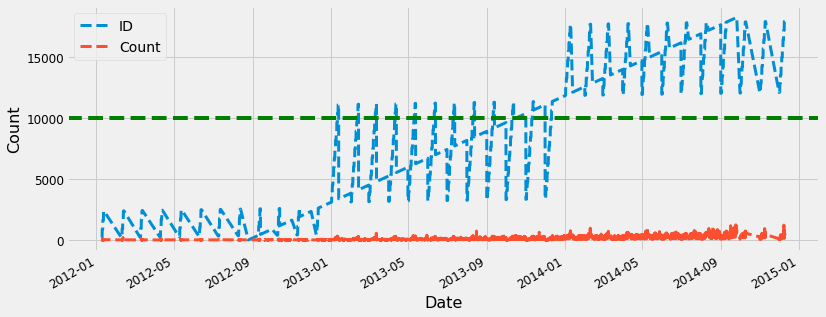

In [75]:
# Marking horizontal lines 
ax = df.plot(figsize=(12,5),fontsize=12, linewidth=3, linestyle='--')
ax.set_ylabel('Count',fontsize=16)
ax.set_xlabel('Date',fontsize=16)
ax.axhline(10000,color='green', linestyle='--')

In [77]:
plt.show()

### 
We made some hypothesis for the effect of hour, day, month and year on the passenger count. So, let’s extract the 
year, month, day and hour from the Datetime to validate our hypothesis.

In [26]:
for i in (test, train, test_original, train_original):
    i['Year']=i.Datetime.dt.year
    i['Month']=i.Datetime.dt.month
    i['Day']= i.Datetime.dt.day
    i['Hour'] = i.Datetime.dt.hour

#### We made a hypothesis for the traffic pattern on weekday and weekend as well. So, let’s make a weekend variable to visualize the impact of weekend on traffic.

We will first extract the day of week from Datetime and then based on the values we will assign whether the day is a weekend or not.

Values of 5 and 6 represents that the days are weekend.

In [28]:
train['Day of Week'] = train['Datetime'].dt.dayofweek
temp=train['Datetime']

In [31]:
def applyer(row):
    if (row.dayofweek == 5 or row.dayofweek==6) :
        return 1
    else:
        return 0

In [32]:
temp2 = train['Datetime'].apply(applyer)
train['weekend']= temp2

In [33]:
# Looking at the time series
train.index= train['Datetime']
# drop ID variable to get date time on x-axis
df= train.drop('ID',1)

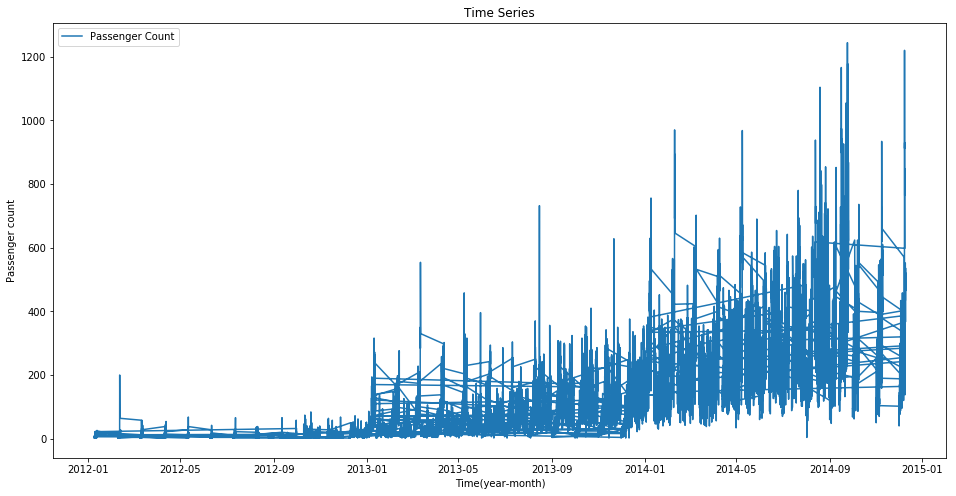

In [34]:
ts = df['Count'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

After having a look at the dataset, we will now try to validate our hypothesis and make other inferences from the dataset.

### 5) Exploratory Analysis
Let us try to verify our hypothesis using the actual data.

## Our first hypothesis was traffic will increase as the years pass by. So let’s look at yearly passenger count.

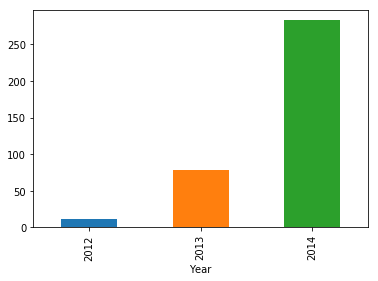

In [36]:
train.groupby('Year')['Count'].mean().plot.bar()

We see an exponential growth in the traffic with respect to year which validates our hypothesis.

### Our second hypothesis was about increase in traffic from May to October. So, let’s see the relation between count and month.

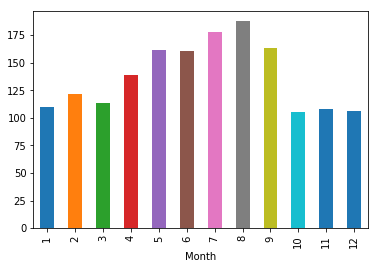

In [38]:
train.groupby('Month')['Count'].mean().plot.bar()

Here we see a decrease in the mean of passenger count in last three months. This does not look right. Let’s look at the monthly mean of each year separately.

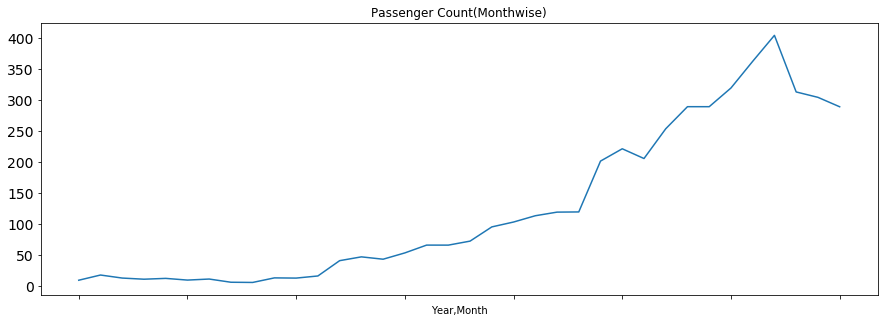

In [42]:
temp=train.groupby(['Year', 'Month'])['Count'].mean() 
temp.plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)

We see that the months 10, 11 and 12 are not present for the year 2014 and the mean value for these months in year 2012 is very less.

Since there is an increasing trend in our time series, the mean value for rest of the months will be more because of their larger passenger counts in year 2014 and we will get smaller value for these 3 months.

In the above line plot we can see an increasing trend in monthly passenger count and the growth is approximately exponential.

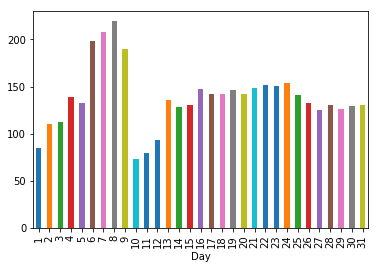

In [43]:
# Looking at daily mean
train.groupby('Day')['Count'].mean().plot.bar()

We are not getting much insights from day wise count of the passengers.

### We also made a hypothesis that the traffic will be more during peak hours. So let’s see the mean of hourly passenger count.



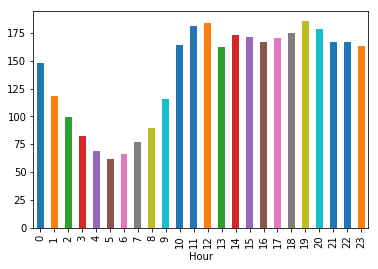

In [44]:
train.groupby('Hour')['Count'].mean().plot.bar()

It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.
After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

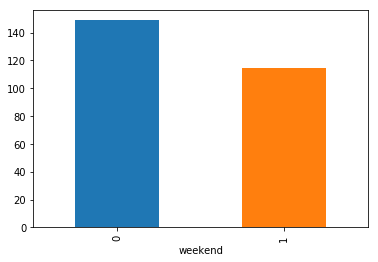

In [45]:
#Let’s try to validate our hypothesis in which we assumed that the traffic will be more on weekdays.

train.groupby('weekend')['Count'].mean().plot.bar()

### Now we will try to look at the day wise passenger count.

#### Note - 0 is the starting of the week, i.e., 0 is Monday and 6 is Sunday.

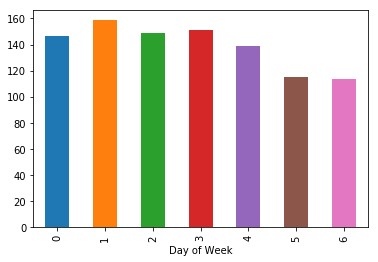

In [48]:
#It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.
train.groupby('Day of Week')['Count'].mean().plot.bar()

In [49]:
#From the above bar plot, we can infer that the passenger count is less for saturday and sunday as compared to the other days of the week. Now we will look at basic modeling techniques. Before that we will drop the ID variable as it has nothing to do with the passenger count.

train=train.drop('ID',1)

### As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily, weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.

In [50]:
train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

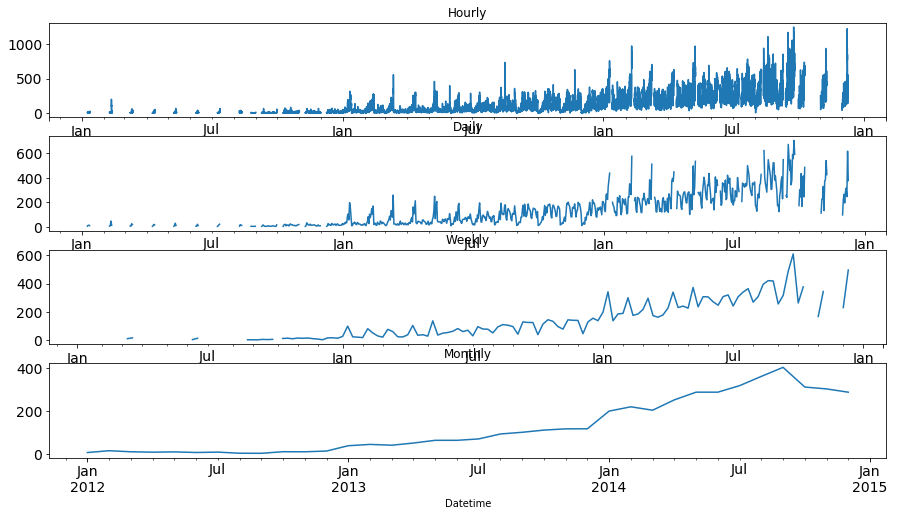

In [54]:
#Let’s look at the hourly, daily, weekly and monthly time series.

fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=14, ax=axs[3]) 
plt.show()

### We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

### But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become very expanded process. So, we will work on the daily time series.



In [57]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 
# Converting to daily mean 
train = train.resample('D').mean()